In [1]:
# External package imports
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pickle
import json

In [3]:
names = [
    "VGG11",
    "VGG14",
    "VGG17",
    "VGG20",
    "VGG11-3D",
    "VGG14-3D",
    "VGG17-3D",
    "VGG20-3D",
    "VGG11-LSTM",
    "VGG14-LSTM",
    "VGG17-LSTM",
    "VGG20-LSTM",
]

results = {}

for name in names:
    with open(f"../results/{name}_result.dict", "rb") as f:
        results[name] = pickle.load(f)

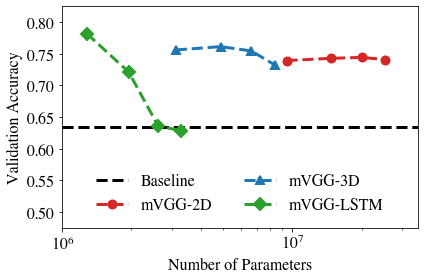

In [17]:
plt.figure()

plt.axhline(0.635, ls="dashed", color="black", lw=3, label="Baseline")

plt.plot(
    [results[name]["n_parameters"] for name in ["VGG11", "VGG14", "VGG17", "VGG20"]],
    [np.amax(results[name]["history"]["val_accuracy"]) for name in ["VGG11", "VGG14", "VGG17", "VGG20"]],
    "--o", color="tab:red", ms=8, markerfacecolor="tab:red", lw=3,
    markeredgewidth=2, label="mVGG-2D"
)

plt.plot(
    [results[name]["n_parameters"] for name in ["VGG11-3D", "VGG14-3D", "VGG17-3D", "VGG20-3D"]],
    [np.amax(results[name]["history"]["val_accuracy"]) for name in ["VGG11-3D", "VGG14-3D", "VGG17-3D", "VGG20-3D"]],
    "--^", color="tab:blue", ms=8, markerfacecolor="tab:blue", lw=3,
    markeredgewidth=2, label="mVGG-3D"
)

plt.plot(
    [results[name]["n_parameters"] for name in ["VGG11-LSTM", "VGG14-LSTM", "VGG17-LSTM", "VGG20-LSTM"]],
    [np.amax(results[name]["history"]["val_accuracy"]) for name in ["VGG11-LSTM", "VGG14-LSTM", "VGG17-LSTM", "VGG20-LSTM"]],
    "--D", color="tab:green", ms=8, markerfacecolor="tab:green", lw=3,
    markeredgewidth=2, label="mVGG-LSTM"
)

plt.xscale("log")
plt.xlim(1e6, 3.5e7)
plt.ylim(0.475, 0.825)
plt.xlabel("Number of Parameters", fontsize=16, fontfamily="Times")
plt.xticks(fontsize=16, fontfamily="Times")
plt.ylabel("Validation Accuracy", fontsize=16, fontfamily="Times")
plt.yticks(fontsize=16, fontfamily="Times")

font = font_manager.FontProperties(family='Times', size=16)
plt.legend(prop=font, frameon=False, ncol=2, loc="lower center")

annot_params = {
    "xycoords": "data",
    "fontsize": 16,
    "fontfamily": "Times",
    "ha": "center",
    "va": "center"
}

"""
plt.annotate("11", (9.5e6, 0.72), **annot_params)
plt.annotate("14", (1.5e7, 0.725), **annot_params)
plt.annotate("17", (2.2e7, 0.733), **annot_params)
plt.annotate("20", (3.2e7, 0.772), **annot_params)

plt.annotate("11", (3e6, 0.74), **annot_params)
plt.annotate("14", (5e6, 0.742), **annot_params)
plt.annotate("17", (8e6, 0.787), **annot_params)
plt.annotate("20", (6.7e6, 0.88), **annot_params)

plt.annotate("11", (1.1e7, 0.875), **annot_params)
"""

plt.tight_layout()
plt.savefig("ratsi_perf.png", dpi=500)